IMPORT LIBRARIES

In [610]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
!pip3 install folium==0.5.0
import folium

In [611]:
## Open plants.csv file. 
## File was used for previous project, so remove CapFac column (will re-calcualte later for practice exercise)

df = pd.read_csv('plants.csv')

# Drop old/unuseful columns
df.drop(columns = df.columns[0], axis = 1, inplace = True)

df.drop('CapFac', axis = 1, inplace = True)

pd.set_option('display.max_columns', None)


In [612]:
# Drop Duplicates
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5393 entries, 0 to 5392
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              5393 non-null   int64  
 1   State           5393 non-null   object 
 2   Name            5393 non-null   object 
 3   County          5393 non-null   object 
 4   Lat             5393 non-null   float64
 5   Lon             5393 non-null   float64
 6   Combust         5393 non-null   float64
 7   Fuel            5364 non-null   object 
 8   FuelCat         5393 non-null   object 
 9   Capacity        5393 non-null   float64
 10  HeatInput       5393 non-null   float64
 11  NetGen          5393 non-null   float64
 12  NOX             5393 non-null   float64
 13  SO2             5393 non-null   float64
 14  CO2             5393 non-null   float64
 15  CoalGen         5393 non-null   float64
 16  OilGen          5393 non-null   float64
 17  GasGen          5393 non-null   f

In [613]:
df.describe()

df.isna().any
df.fillna('')

,ID,State,Name,County,Lat,Lon,Combust,Fuel,FuelCat,Capacity,HeatInput,NetGen,NOX,SO2,CO2,CoalGen,OilGen,GasGen,NuclearGen,HydroGen,BiomassGen,WindGen,SolarGen,GeoGen,OtherFossilGen,OtherGen,NonRenewGen,RenewGen,CombGen,NonCombGen,CoalPortion,SO2OutRate,CO2OutRate,NOXOutRate,NOXInRate,CO2InRate,SO2InRate
0,1,AK,Alakanuk,Wade Hampton,62.6833,-164.6544,1.0,JF,OIL,1.3,15801.5,1859.0,19.26,0.00,1262.7,0.0,1859.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1859.0,0.0,1859.0,0.0,0.000000,0.000000,0.679236,0.010360,0.001219,0.07991,0.0
1,2,AK,Anchorage 1,Anchorage,61.2328,-149.8909,1.0,NG,GAS,103.1,666135.0,55428.0,92.00,1.32,39074.5,0.0,366.5,55061.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55428.0,0.0,55428.0,0.0,0.000000,0.000024,0.704960,0.001660,0.000138,0.058659,0.000002
2,3,AK,Angoon,Juneau,57.8425,-134.9772,1.0,DFO,OIL,1.5,16388.0,1928.0,19.98,0.66,1340.7,0.0,1928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1928.0,0.0,1928.0,0.0,0.000000,0.000342,0.695384,0.010363,0.001219,0.08181,0.00004
3,4,AK,Aniak,Bethel,61.5875,-159.5317,1.0,DFO,OIL,1.1,28860.0,2725.0,35.18,1.19,2361.1,0.0,2725.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2725.0,0.0,2725.0,0.0,0.000000,0.000437,0.866459,0.012910,0.001219,0.081812,0.000041
4,5,AK,Annex Creek,Juneau,58.3167,-134.0958,0.0,WAT,HYDRO,4.0,0.0,26436.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,26436.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26436.0,0.0,26436.0,0.000000,0.000000,0.000000,0.000000,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388,5389,WY,Wygen 1,Campbell,44.2862,-105.3843,1.0,SUB,COAL,88.0,7815306.3,639854.0,528.88,538.53,824083.1,638669.8,0.0,1184.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,639854.0,0.0,639854.0,0.0,0.998149,0.000842,1.287924,0.000827,0.000068,0.105445,0.000069
5389,5390,WY,Wygen 2,Campbell,44.2911,-105.3815,1.0,SUB,COAL,95.0,9150621.5,729018.0,288.59,213.48,964893.0,725733.7,0.0,3284.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,729018.0,0.0,729018.0,0.0,0.995495,0.000293,1.323552,0.000396,0.000032,0.105446,0.000023
5390,5391,WY,Wygen III,Campbell,44.2919,-105.3806,1.0,SUB,COAL,116.2,5967481.9,598363.0,130.39,173.08,629242.5,595841.5,0.0,2521.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,598363.0,0.0,598363.0,0.0,0.995786,0.000289,1.051607,0.000218,0.000022,0.105445,0.000029
5391,5392,WY,Wyodak,Campbell,44.2886,-105.3847,1.0,SUB,COAL,362.0,30504224.8,2564505.0,4221.28,6768.09,3216523.3,2560639.9,3865.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2564505.0,0.0,2564505.0,0.0,0.998493,0.002639,1.254247,0.001646,0.000138,0.105445,0.000222


<b> Capacity Factor [CapFac] - ratio of lactual output over a year to potential output (if operating at full nameplate capacity) </b> <br><br>
The capacity factor of a power plant is the ratio of its actual output over a year, to its potential output if it were possible for it to operate at full nameplate capacity continuously over the same year. In the dataset, it could be calculate as follows: Plant Capacity Factor (CapFac) = (NetGen / (Capacity × 8760)).



In [614]:
df['CapFac'] = df['NetGen'] / (df['Capacity'] * 87600)

<b> Plant Nominal Heat Rate [HeatRate] - how efficiently primary fuel is converted to electric energy </b> <br><br>
For combustion plants, the heat rate quantifies how efficiently the primary fuel is converted to electric energy. It is calculated as follows: For combustion plants (Combust = 1), HeatRate = 1000 × (HeatInput / NetGen). For partial combustion plants (Combust = 0.5), HeatRate = 1000 × (HeatInput / CombGen).



In [615]:
## Iterate through combustion column. 
## Check value in each row, if value == 1 then use NetGen in the HeatRate equation, 
## if value == 0.5 use CombGen in the HeatRate equation

for row in df['Combust']:
    if row == 1.0:
        df['HeatRate'] = 1000 * (df['HeatInput'] / df['NetGen'])
    elif row == 0.5:
       df['HeatRate'] = 1000 * (df['HeatInput'] / df['CombGen'])


Text(0.5, 1.0, 'Combustion Distribution')

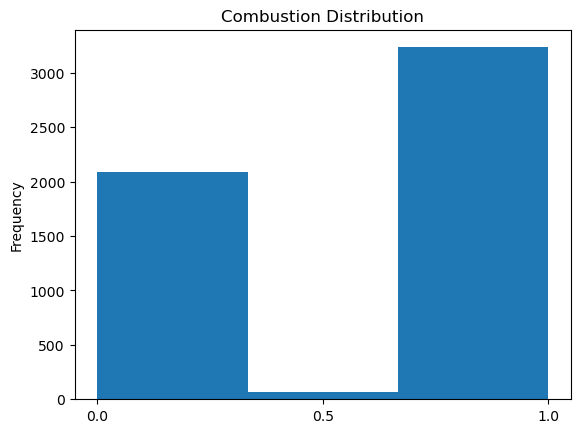

In [616]:
## Plot histogram of HeatRate

count, bin_edges = np.histogram(df['Combust'])
df['Combust'].plot(kind = 'hist', bins = 3, xticks = [0, 0.5, 1.0])
plt.title('Combustion Distribution')


<b> Annual Output Emissions Rate for Different Pollutants </b> <br><br>
For combustion plants, the emissions rate quantifies how much gas pollutants are generated per unit electricity generation. For example, for Plant Annual SO2 Output Emission Rate (SO2Rate), we have SO2Rate = 2000 × (SO2 / NetGen). NetGen is always the denominator for calculation.

In [617]:
# Identify combustion plants and perform the Pollutant Rate based on pollutant amounts and NetGen of the plant
        
for row in df['Combust']:
    if row == 1.0:
       df['SO2Rate'] = 2000 * df['SO2'] / df['NetGen']


for row in df['Combust']:
    if row == 1.0:
       df['CO2Rate'] = 2000 * df['CO2'] / df['NetGen']

for row in df['Combust']:
    if row == 1.0:
       df['NOXRate'] = 2000 * df['NOX'] / df['NetGen']


<b> Compute fraction of US Electricity from combustion plant vs other plant types.

In [618]:
# Determine amount of NetGen for each plant type.

totalCombust = df.loc[df['Combust'] == 1.0, 'NetGen'].sum()

totalCogen = df.loc[df['Combust'] == 0.5, 'NetGen'].sum()

totalRenewable = df.loc[df['Combust'] == 0.0, 'NetGen'].sum()

#Determine percent of total generation grouped by plant type

percentCombust = totalCombust / (totalCombust + totalCogen + totalRenewable)
percentCogen = totalCogen / (totalCombust + totalCogen + totalRenewable)
percentRenewable = totalRenewable / (totalCombust + totalCogen + totalRenewable)

print(percentCombust)

#Determine % of combustion plants out of all plants listed

numberCombust = df[df['Combust'] == 1.0].shape[0]
percentPlantsCombust = numberCombust / df['Combust'].shape[0]
print(percentPlantsCombust)

0.7062441172839095
0.5994808084554052


<b> Focus on Combustion plants as they are the majority plants and majority of electricity generation

In [619]:
# Remove non combustion plants from dataframe
combust = df[df['Combust'] == 1.0]

coGen = df[df['Combust'] == 0.5]

cogenPercent = coGen.shape[0] / (combust.shape[0] + coGen.shape[0])
print(cogenPercent)

cogenProductionPercent = sum(coGen['NetGen']) / (sum(coGen['NetGen']) + sum (combust['NetGen']))
print(cogenProductionPercent)

#Remove CoGen plants as they only 2% of the number of plants and 2% of the net generation of electricity

combust.head()

0.02148910411622276
0.028692956804630933


,ID,State,Name,County,Lat,Lon,Combust,Fuel,FuelCat,Capacity,HeatInput,NetGen,NOX,SO2,CO2,CoalGen,OilGen,GasGen,NuclearGen,HydroGen,BiomassGen,WindGen,SolarGen,GeoGen,OtherFossilGen,OtherGen,NonRenewGen,RenewGen,CombGen,NonCombGen,CoalPortion,SO2OutRate,CO2OutRate,NOXOutRate,NOXInRate,CO2InRate,SO2InRate,CapFac,HeatRate,SO2Rate,CO2Rate,NOXRate
0,1,AK,Alakanuk,Wade Hampton,62.6833,-164.6544,1.0,JF,OIL,1.3,15801.5,1859.0,19.26,0.00,1262.7,0.0,1859.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1859.0,0.0,1859.0,0.0,0.0,0.000000,0.679236,0.010360,0.001219,0.079910,0.000000,0.016324,8500.000000,0.000000,1358.472297,20.720818
1,2,AK,Anchorage 1,Anchorage,61.2328,-149.8909,1.0,NG,GAS,103.1,666135.0,55428.0,92.00,1.32,39074.5,0.0,366.5,55061.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55428.0,0.0,55428.0,0.0,0.0,0.000024,0.704960,0.001660,0.000138,0.058659,0.000002,0.006137,12018.023382,0.047629,1409.919174,3.319622
2,3,AK,Angoon,Juneau,57.8425,-134.9772,1.0,DFO,OIL,1.5,16388.0,1928.0,19.98,0.66,1340.7,0.0,1928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1928.0,0.0,1928.0,0.0,0.0,0.000342,0.695384,0.010363,0.001219,0.081810,0.000040,0.014673,8500.000000,0.684647,1390.767635,20.726141
3,4,AK,Aniak,Bethel,61.5875,-159.5317,1.0,DFO,OIL,1.1,28860.0,2725.0,35.18,1.19,2361.1,0.0,2725.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2725.0,0.0,2725.0,0.0,0.0,0.000437,0.866459,0.012910,0.001219,0.081812,0.000041,0.028279,10590.825688,0.873394,1732.917431,25.820183
5,6,AK,Auke Bay,Juneau,58.3861,-134.6389,1.0,DFO,OIL,36.2,5506.0,335.0,0.99,0.23,450.5,0.0,335.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335.0,0.0,335.0,0.0,0.0,0.000687,1.344776,0.002955,0.000180,0.081820,0.000042,0.000106,16435.820896,1.373134,2689.552239,5.910448


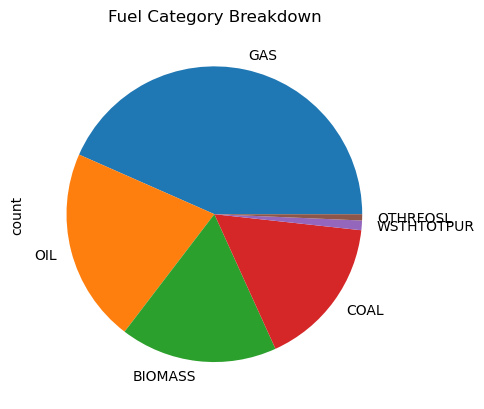

In [624]:
# Explore the which Primary Fuel sources are most prominent
combust['FuelCat'].value_counts().plot(kind = 'pie')
plt.title('Fuel Category Breakdown')
plt.show()

In [586]:
# Explore how much primary fuel source is used at each plant relative to toher fuel sources at said plant

oil = combust[combust['FuelCat'] == 'OIL']
gas = combust[combust['FuelCat'] == 'GAS']
biomass = combust[combust['FuelCat'] == 'BIOMASS']
coal = combust[combust['FuelCat'] == 'COAL']
otherfossil = combust[combust['FuelCat'] == 'OTHRFOSL']

# For each primary fuel type, determine the percent of generation relative to all other non-primary fuel types at the plant. 
# Take average percent from all plants to report out

percentOil = oil['OilGen'] / (oil['CoalGen'] + 
                                    oil['OilGen'] + 
                                    oil['GasGen'] + 
                                    oil['NuclearGen'] + 
                                    oil['HydroGen'] +
                                    oil['BiomassGen'] +
                                    oil['WindGen'] +
                                    oil['SolarGen'] +
                                    oil['GeoGen'] +
                                    oil['OtherFossilGen'])

avePercentOil = mean(percentOil)
print(avePercentOil)

percentGas = gas['GasGen'] / (gas['CoalGen'] + 
                                    gas['OilGen'] + 
                                    gas['GasGen'] + 
                                    gas['NuclearGen'] + 
                                    gas['HydroGen'] +
                                    gas['BiomassGen'] +
                                    gas['WindGen'] +
                                    gas['SolarGen'] +
                                    gas['GeoGen'] +
                                    gas['OtherFossilGen'])

avePercentGas = mean(percentGas)
print(avePercentGas)

percentBiomass = biomass['BiomassGen'] / (biomass['CoalGen']+ 
                                    biomass['OilGen'] + 
                                    biomass['GasGen'] + 
                                    biomass['NuclearGen'] + 
                                    biomass['HydroGen'] +
                                    biomass['BiomassGen'] +
                                    biomass['WindGen'] +
                                    biomass['SolarGen'] +
                                    biomass['GeoGen'] +
                                    biomass['OtherFossilGen'])

avePercentBiomass = mean(percentBiomass)
print(avePercentBiomass)

percentCoal = coal['CoalGen'] / (coal['CoalGen']+ 
                                    coal['OilGen'] + 
                                    coal['GasGen'] + 
                                    coal['NuclearGen'] + 
                                    coal['HydroGen'] +
                                    coal['BiomassGen'] +
                                    coal['WindGen'] +
                                    coal['SolarGen'] +
                                    coal['GeoGen'] +
                                    coal['OtherFossilGen'])

avePercentCoal = mean(percentCoal)
print(avePercentCoal)

percentOtherFossil = otherfossil['OtherFossilGen'] / (otherfossil['CoalGen']+ 
                                    otherfossil['OilGen'] + 
                                    otherfossil['GasGen'] + 
                                    otherfossil['NuclearGen'] + 
                                    otherfossil['HydroGen'] +
                                    otherfossil['BiomassGen'] +
                                    otherfossil['WindGen'] +
                                    otherfossil['SolarGen'] +
                                    otherfossil['GeoGen'] +
                                    otherfossil['OtherFossilGen'])

avePercentOtherFossil = mean(percentOtherFossil)
print(avePercentOtherFossil)

#### Since, on average, a plant uses ~90% of the primary fuel type relative to other non-primary fuel types, only focus on primary fuel types. 

0.972825844007639
0.9679252068152374
0.8935279467577016
0.9625795728058765
0.8706239450390745


Emissions per fuel type (CO2, SO2, NOx)

<b> SO2 Emissions Per Fuel Type

Text(0, 0.5, 'Percent SO2 Emissions by Primary Fuel Type relative to Total SO2 Emissions from the Plant')

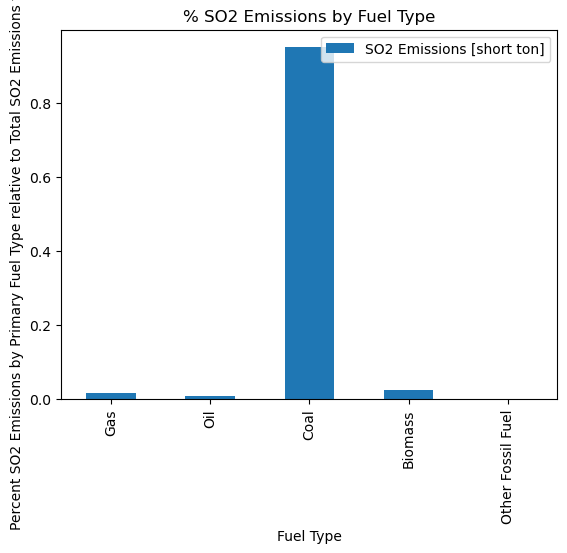

In [587]:
# For each primary fuel type, find the total SO2 emissions for said fuel type
# For each primary fuel type, find the total SO2 emissions for the entire plant
# Determine percent of SO2 emissions for the primary fuel type relative to all fuel types

total_gas_so2 = gas['SO2'].sum()
percent_gas_so2 = total_gas_so2 / combust['SO2'].sum()

total_oil_so2 = oil['SO2'].sum()
percent_oil_so2 = total_oil_so2 / combust['SO2'].sum()

total_coal_so2 = coal['SO2'].sum()
percent_coal_so2 = total_coal_so2 / combust['SO2'].sum()

total_biomass_so2 = biomass['SO2'].sum()
percent_biomass_so2 = total_biomass_so2 / combust['SO2'].sum()

total_other_so2 = otherfossil['SO2'].sum()
percent_other_so2 = total_other_so2 / combust['SO2'].sum()

SO2_byFuelType = {'Fuel Type' : ['Gas', 'Oil', 'Coal', 'Biomass', 'Other Fossil Fuel'], 
                  'SO2 Emissions [short ton]': [percent_gas_so2, percent_oil_so2, percent_coal_so2, percent_biomass_so2, percent_other_so2]}

SO2_df = pd.DataFrame(SO2_byFuelType)
SO2_df.plot(kind = 'bar', x = 'Fuel Type')
plt.title('% SO2 Emissions by Fuel Type')
plt.ylabel('Percent SO2 Emissions by Primary Fuel Type relative to Total SO2 Emissions from the Plant')

<b> CO2 Emissions by Fuel Type

Text(0, 0.5, 'Percent CO2 Emissions by Primary Fuel Type relative to Total CO2 Emissions from the Plant')

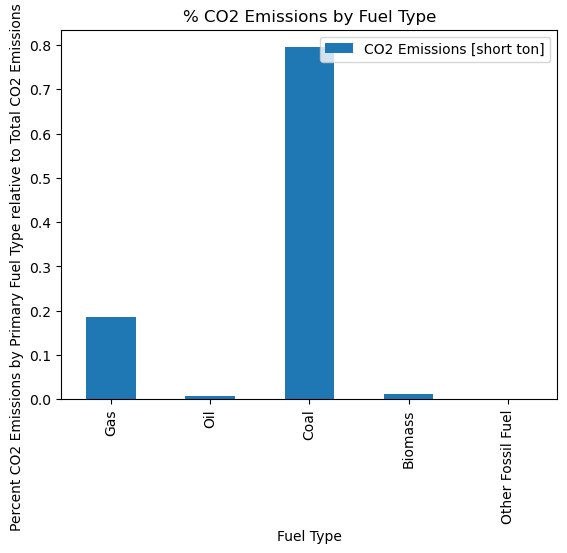

In [588]:
# For each primary fuel type, find the total SO2 emissions for said fuel type
# For each primary fuel type, find the total SO2 emissions for the entire plant
# Determine percent of SO2 emissions for the primary fuel type relative to all fuel types

total_gas_co2 = gas['CO2'].sum()
percent_gas_co2 = total_gas_co2 / combust['CO2'].sum()

total_oil_co2 = oil['CO2'].sum()
percent_oil_co2 = total_oil_co2 / combust['CO2'].sum()

total_coal_co2 = coal['CO2'].sum()
percent_coal_co2 = total_coal_co2 / combust['CO2'].sum()

total_biomass_co2 = biomass['CO2'].sum()
percent_biomass_co2 = total_biomass_co2 / combust['CO2'].sum()

total_other_co2 = otherfossil['CO2'].sum()
percent_other_co2 = total_other_co2 / combust['CO2'].sum()

CO2_byFuelType = {'Fuel Type' : ['Gas', 'Oil', 'Coal', 'Biomass', 'Other Fossil Fuel'], 
                  'CO2 Emissions [short ton]': [percent_gas_co2, percent_oil_co2, percent_coal_co2, percent_biomass_co2, percent_other_co2]}

CO2_df = pd.DataFrame(CO2_byFuelType)
CO2_df.plot(kind = 'bar', x = 'Fuel Type')
plt.title('% CO2 Emissions by Fuel Type')
plt.ylabel('Percent CO2 Emissions by Primary Fuel Type relative to Total CO2 Emissions from the Plant')

<b> NOX Emissions by Fuel Type

Text(0, 0.5, 'Percent NOX Emissions by Primary Fuel Type relative to Total NOX Emissions from the Plant')

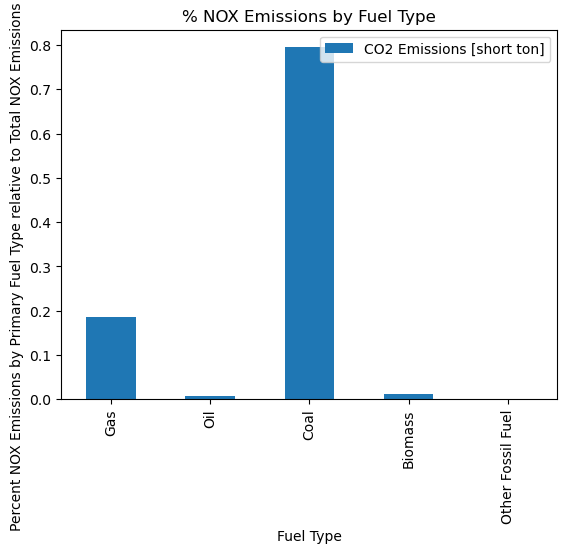

In [589]:
# For each primary fuel type, find the total SO2 emissions for said fuel type
# For each primary fuel type, find the total SO2 emissions for the entire plant
# Determine percent of SO2 emissions for the primary fuel type relative to all fuel types

total_gas_nox = gas['NOX'].sum()
percent_gas_nox = total_gas_nox / combust['NOX'].sum()

total_oil_nox = oil['NOX'].sum()
percent_oil_nox = total_oil_nox / combust['NOX'].sum()

total_coal_nox = coal['NOX'].sum()
percent_coal_nox = total_coal_nox / combust['NOX'].sum()

total_biomass_nox = biomass['NOX'].sum()
percent_biomass_nox = total_biomass_nox / combust['NOX'].sum()

total_other_nox = otherfossil['NOX'].sum()
percent_other_nox = total_other_nox / combust['NOX'].sum()

NOX_byFuelType = {'Fuel Type' : ['Gas', 'Oil', 'Coal', 'Biomass', 'Other Fossil Fuel'], 
                  'NOX Emissions [short ton]': [percent_gas_nox, percent_oil_nox, percent_coal_nox, percent_biomass_nox, percent_other_nox]}

NOX_df = pd.DataFrame(CO2_byFuelType)
NOX_df.plot(kind = 'bar', x = 'Fuel Type')
plt.title('% NOX Emissions by Fuel Type')
plt.ylabel('Percent NOX Emissions by Primary Fuel Type relative to Total NOX Emissions from the Plant')



<b> Create DF and Bar Chart showing three emissions type percentages grouped by fuel type

Text(0.5, 1.0, 'NOX, CO2, SO2 Emissions as Percentage of Plant Total Emissions, by Fuel Type')

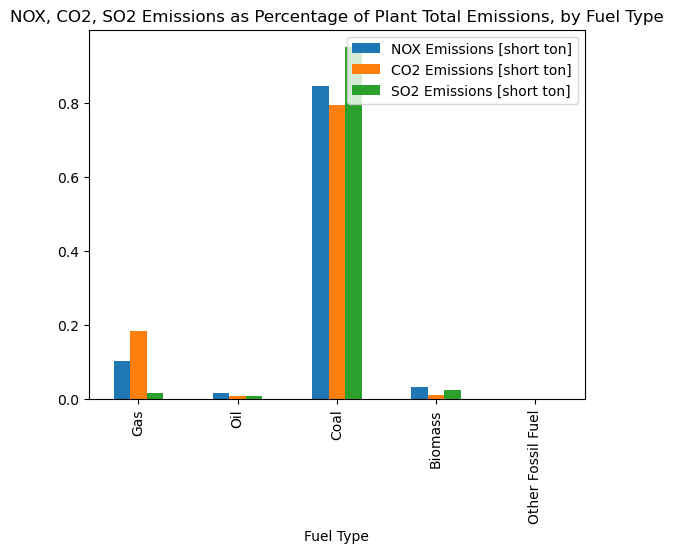

In [590]:
EmissionsbyFuelType = {'Fuel Type' : ['Gas', 'Oil', 'Coal', 'Biomass', 'Other Fossil Fuel'], 
                       'NOX Emissions [short ton]': [percent_gas_nox, percent_oil_nox, percent_coal_nox, percent_biomass_nox, percent_other_nox],
                       'CO2 Emissions [short ton]': [percent_gas_co2, percent_oil_co2, percent_coal_co2, percent_biomass_co2, percent_other_co2],
                       'SO2 Emissions [short ton]': [percent_gas_so2, percent_oil_so2, percent_coal_so2, percent_biomass_so2, percent_other_so2]
                      }

emissions_df = pd.DataFrame(EmissionsbyFuelType)

emissions_df.plot(kind = 'bar', x = 'Fuel Type')
plt.title('NOX, CO2, SO2 Emissions as Percentage of Plant Total Emissions, by Fuel Type')

<b> Plant Characteristics

Text(0, 0.5, 'NOX')

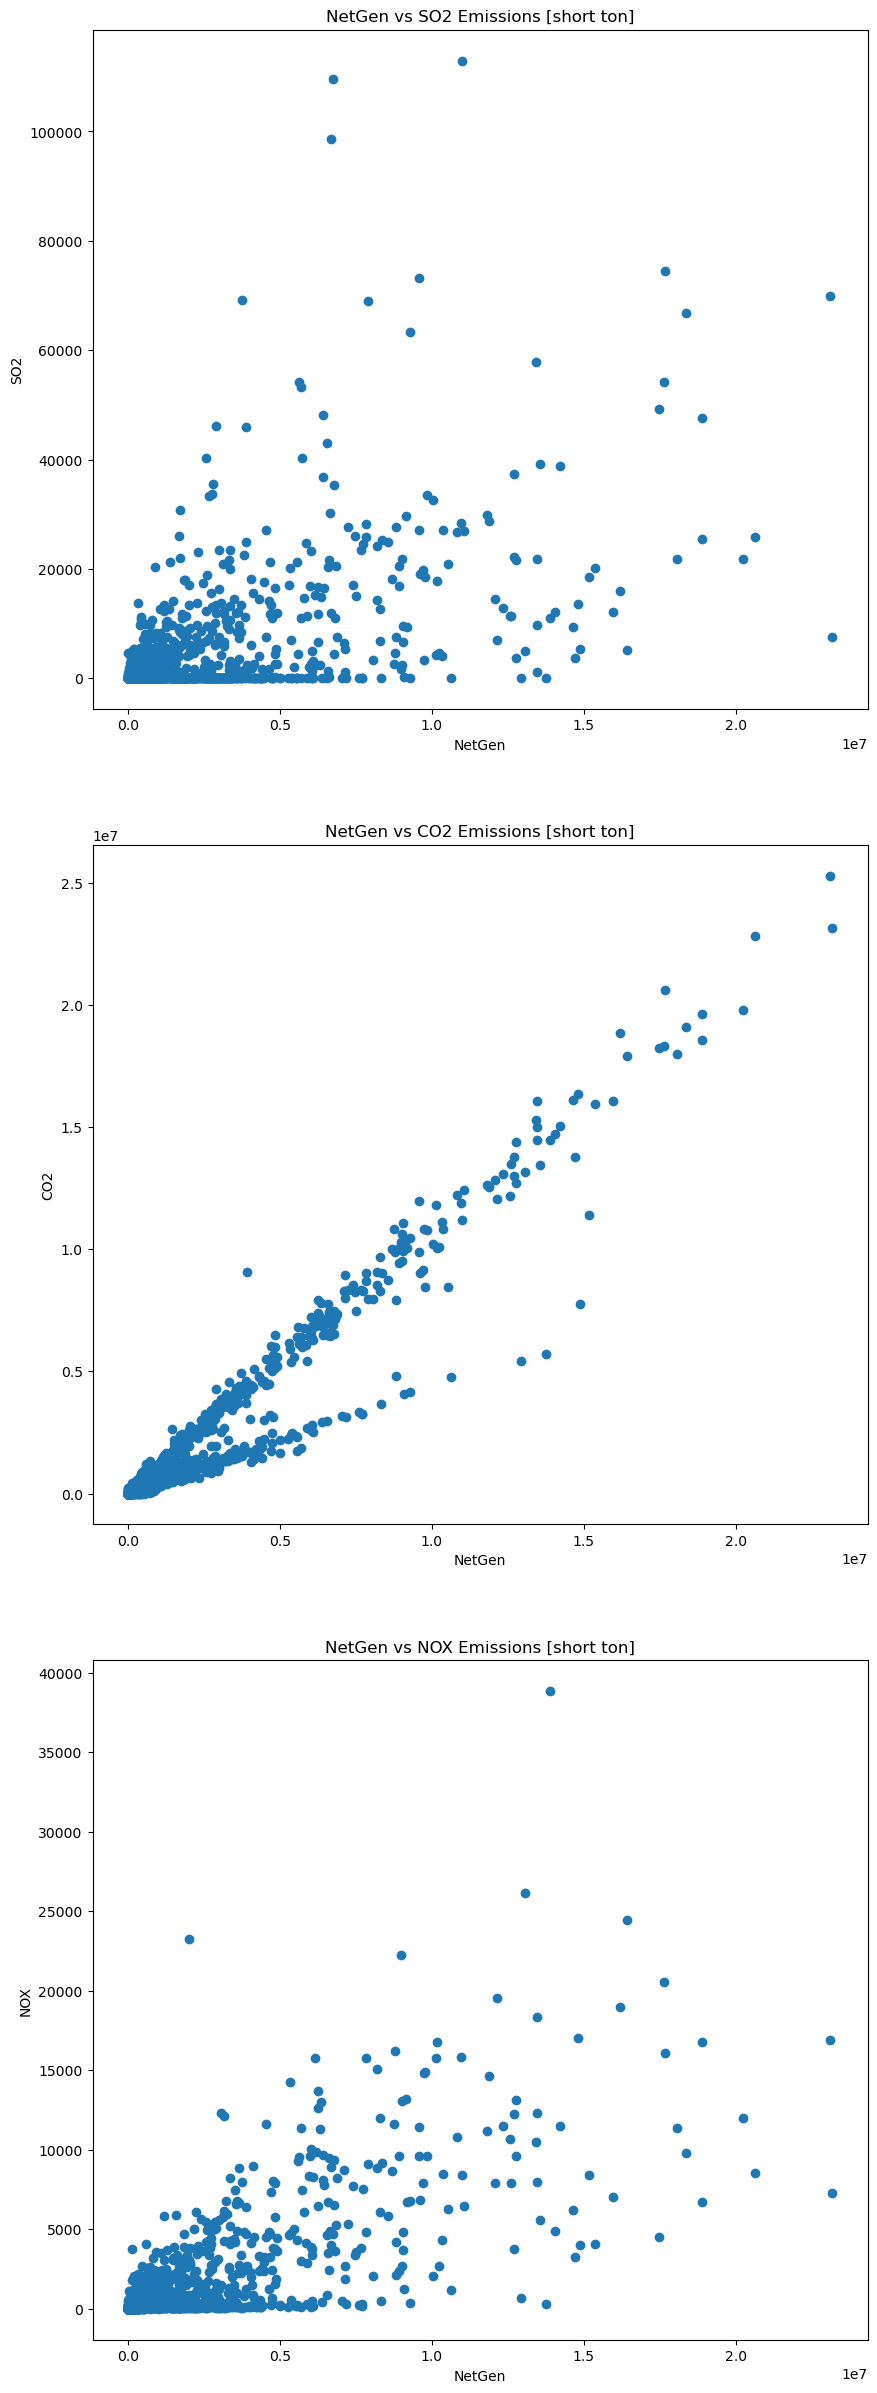

In [591]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (10,30))
#ax = fig.add_sublplot(3,1,1)
#ax1 = fig.add_subplot(3,1,1)

ax1.scatter(x = 'NetGen', y = 'SO2', data = combust)
ax1.title.set_text('NetGen vs SO2 Emissions [short ton]')
ax1.set_xlabel('NetGen')
ax1.set_ylabel('SO2')

ax2.scatter(x = 'NetGen', y = 'CO2', data = combust)
ax2.title.set_text('NetGen vs CO2 Emissions [short ton]')
ax2.set_xlabel('NetGen')
ax2.set_ylabel('CO2')

ax3.scatter(x = 'NetGen', y = 'NOX', data = combust)
ax3.title.set_text('NetGen vs NOX Emissions [short ton]')
ax3.set_xlabel('NetGen')
ax3.set_ylabel('NOX')



<b> Latitude vs NetGen

Text(0.5, 1.0, 'NetGen vs Latitude')

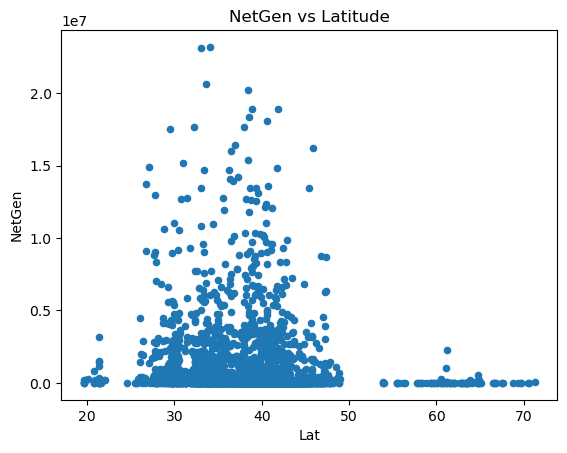

In [592]:
combust.plot(kind = 'scatter', x = 'Lat', y = 'NetGen')
plt.title('NetGen vs Latitude')

Text(0.5, 1.0, 'NetGen vs Longitute')

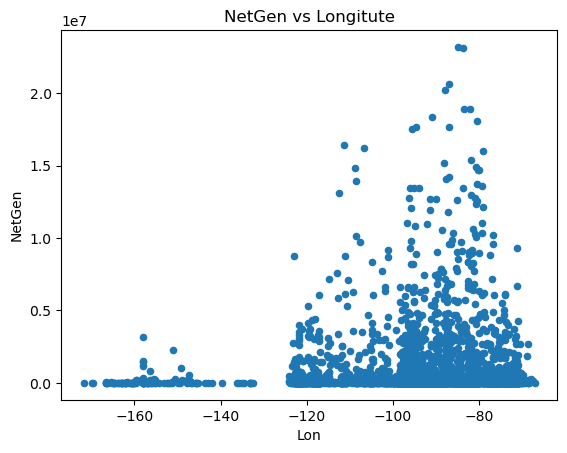

In [593]:
combust.plot(kind = 'scatter', x = 'Lon', y = 'NetGen')
plt.title('NetGen vs Longitute')

<b> Create Map with Markers for Power Plants - Color Based on SO2 Emissions Normalized to NetGen

In [594]:
## Create a SO2 emissions normlaized to NetGen colummn to be used to highlight folium markers
combust['Normalized SO2'] = np.divide( combust['SO2'], combust['NetGen'])

meancombust = statistics.mean(combust['Normalized SO2'])
 

/var/folders/rb/w3w2dkfx3z5g34tn1ddxygrc0000gn/T/ipykernel_21156/625545360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combust['Normalized SO2'] = np.divide( combust['SO2'], combust['NetGen'])


In [602]:
map = folium.Map(location = [38.7946, -106.5348], zoom_start = 4)
#folium.Marker(location = [combust['Lat'], combust['Lon']])


#df.apply(lambda row:folium.CircleMarker(location=[row["Lat"], 
 #                                                 row["Lon"]]).add_to(map),axis=1)

for row1, row2, row3 in zip(combust['Normalized SO2'], combust['Lat'], combust['Lon']):
    if row1 < (meancombust * 0.66):
        color = 'green'
    elif (meancombust * 0.66) < row1 < (meancombust * 1.33):
        color = 'yellow'
    elif row1 > (meancombust * 1.33):
        color = 'red'
    folium.CircleMarker(
        location=[row2, row3], 
        color = color, 
        radius = 0.5,
        fill = True, 
        fill_color = color, 
        fill_opacity = 0.3, 
        axis = 1).add_to(map)
map

Text(0, 0.5, 'NOX')

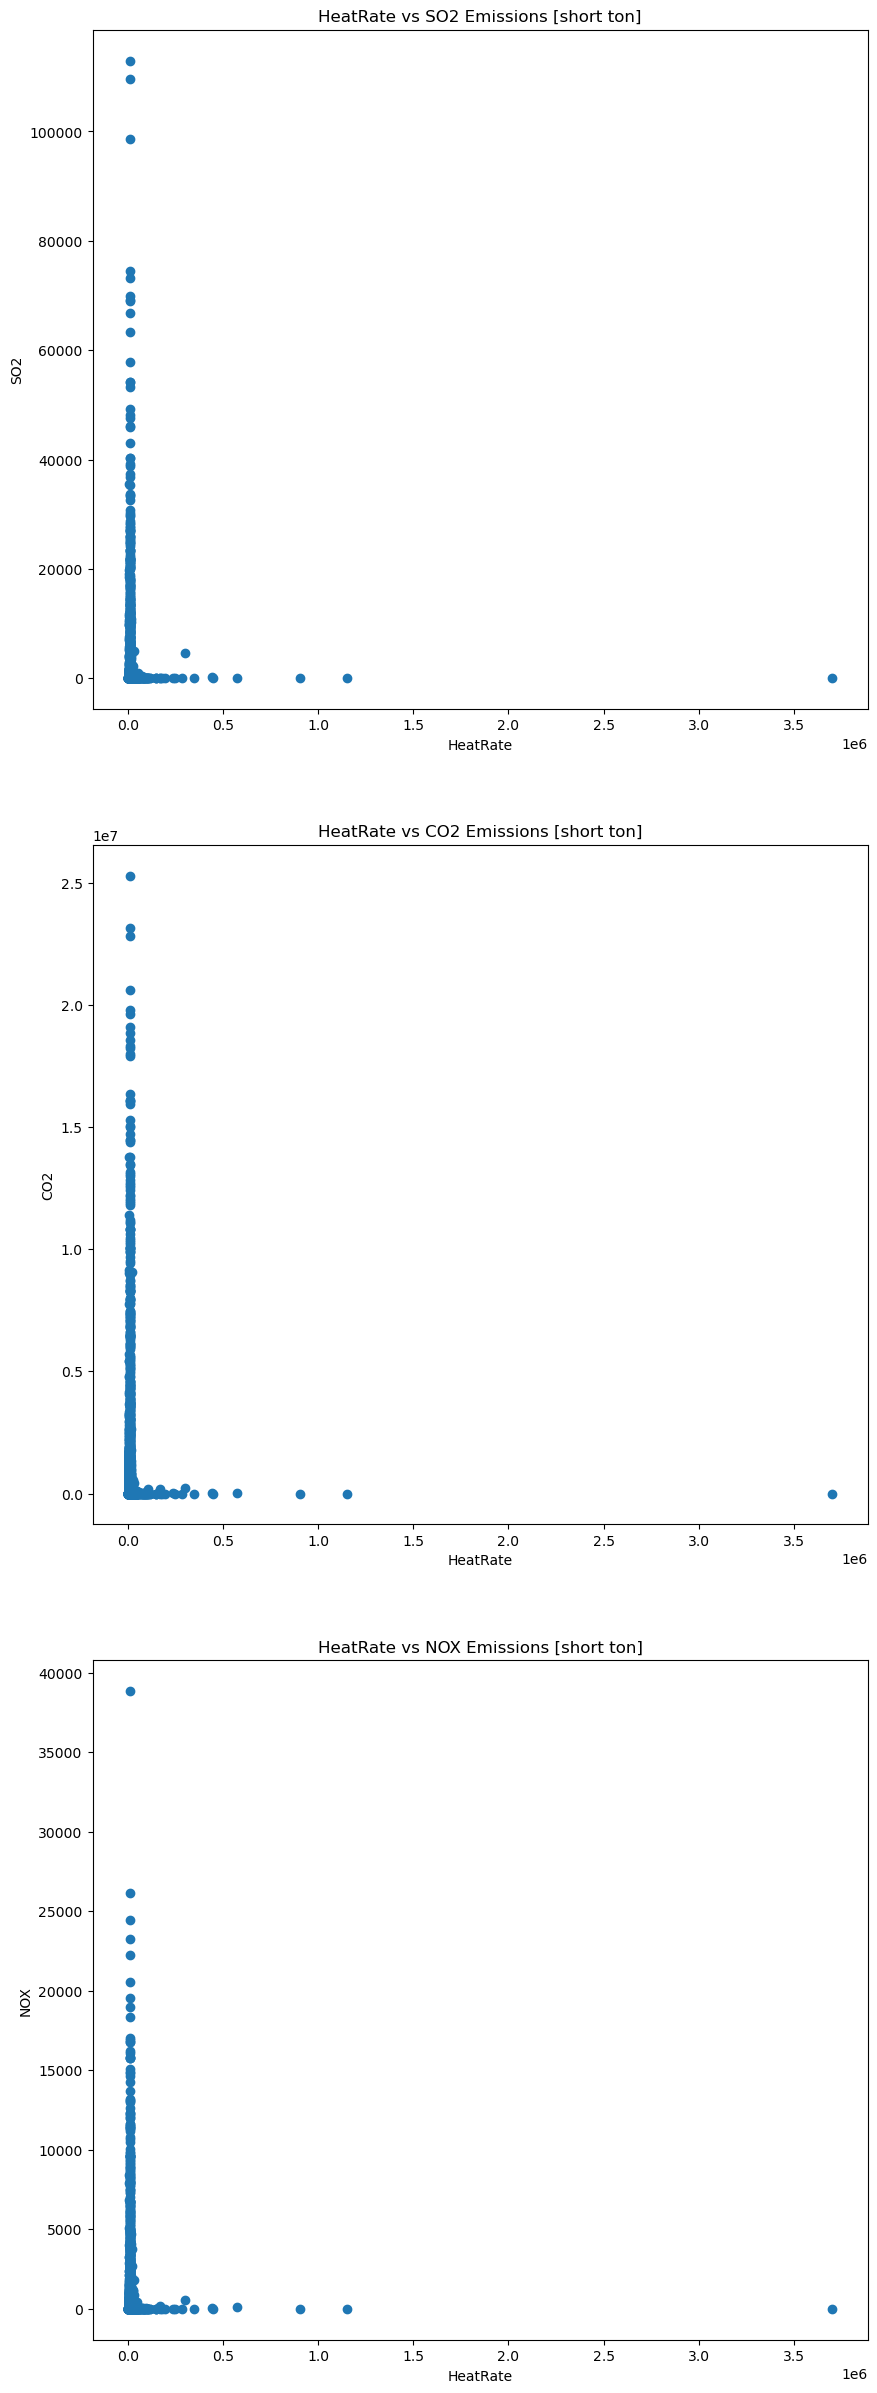

In [596]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (10,30))

ax1.scatter(x = 'HeatRate', y = 'SO2', data = combust)
ax1.title.set_text('HeatRate vs SO2 Emissions [short ton]')
ax1.set_xlabel('HeatRate')
ax1.set_ylabel('SO2')

ax2.scatter(x = 'HeatRate', y = 'CO2', data = combust)
ax2.title.set_text('HeatRate vs CO2 Emissions [short ton]')
ax2.set_xlabel('HeatRate')
ax2.set_ylabel('CO2')

ax3.scatter(x = 'HeatRate', y = 'NOX', data = combust)
ax3.title.set_text('HeatRate vs NOX Emissions [short ton]')
ax3.set_xlabel('HeatRate')
ax3.set_ylabel('NOX')


Text(0, 0.5, 'NOX')

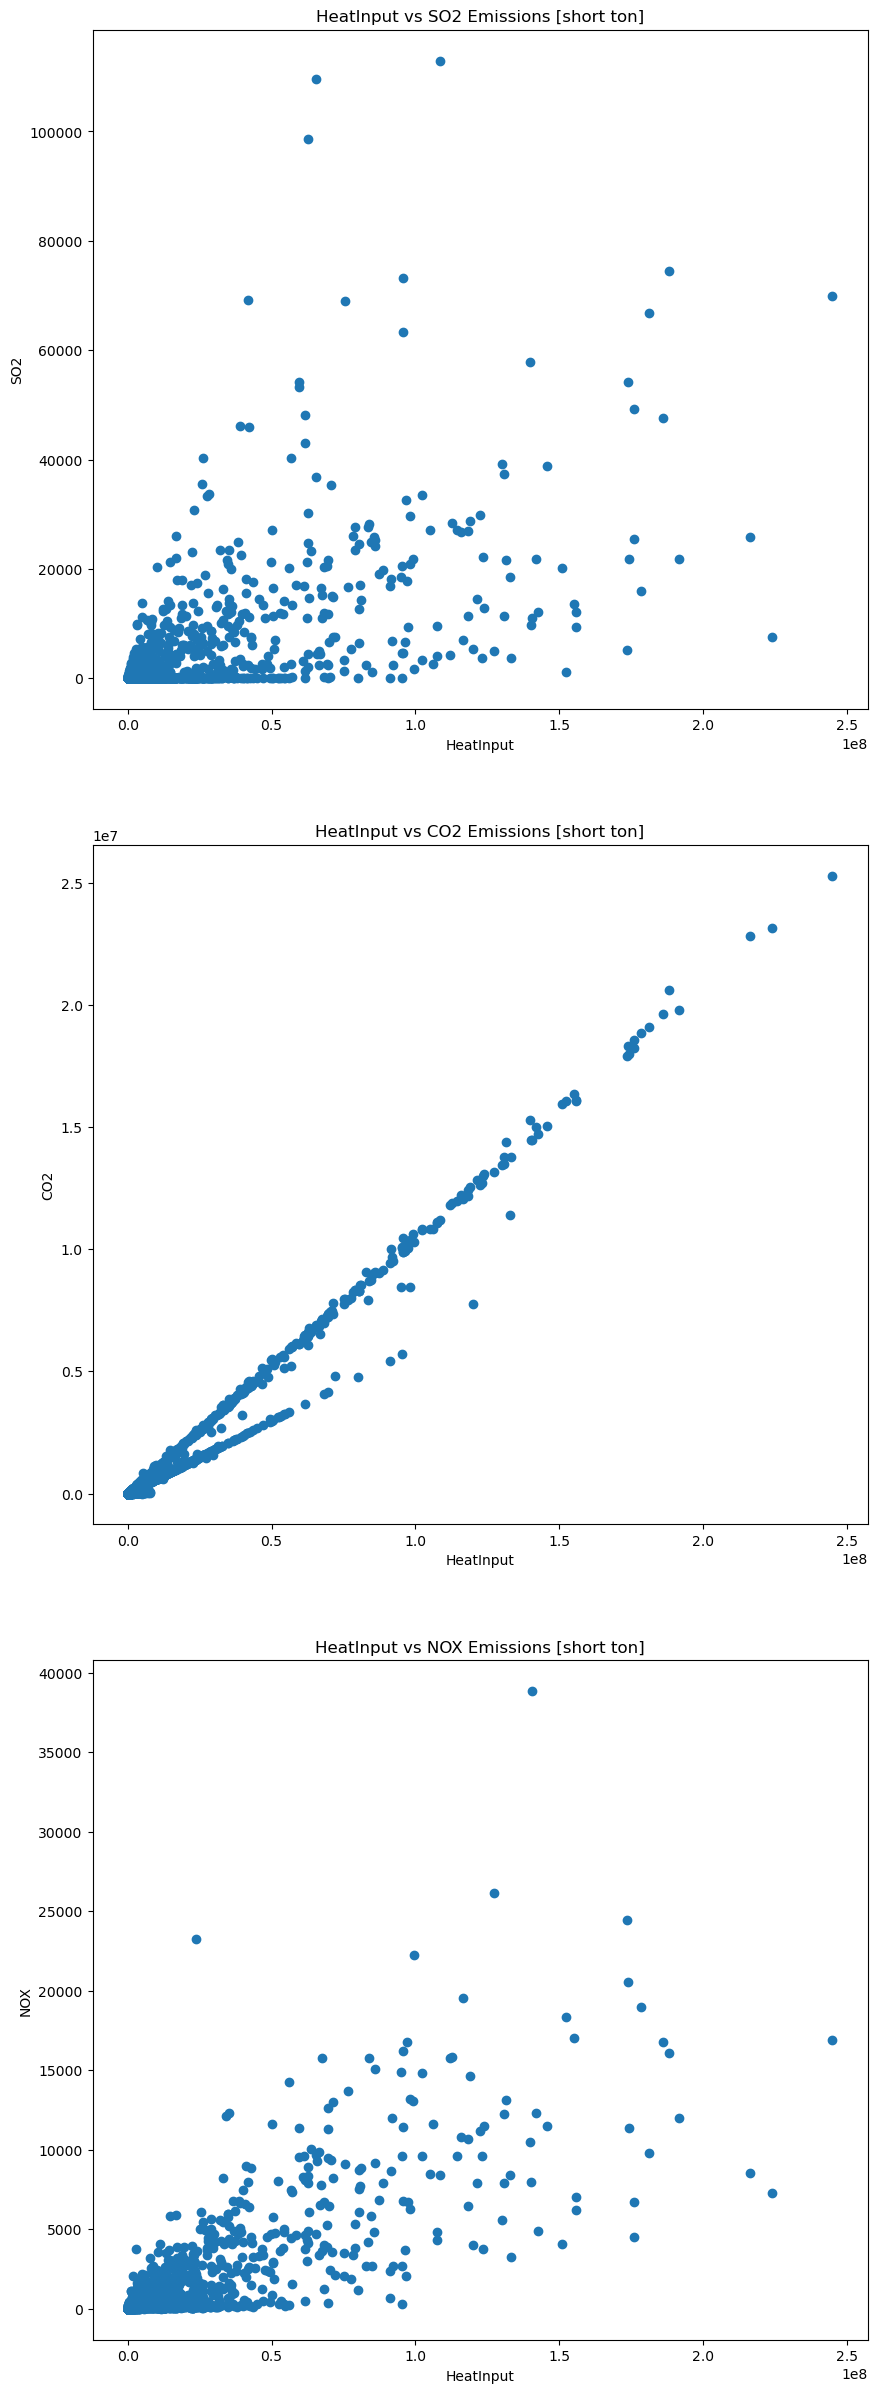

In [597]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (10,30))
#ax = fig.add_sublplot(3,1,1)
#ax1 = fig.add_subplot(3,1,1)

ax1.scatter(x = 'HeatInput', y = 'SO2', data = combust)
ax1.title.set_text('HeatInput vs SO2 Emissions [short ton]')
ax1.set_xlabel('HeatInput')
ax1.set_ylabel('SO2')

ax2.scatter(x = 'HeatInput', y = 'CO2', data = combust)
ax2.title.set_text('HeatInput vs CO2 Emissions [short ton]')
ax2.set_xlabel('HeatInput')
ax2.set_ylabel('CO2')

ax3.scatter(x = 'HeatInput', y = 'NOX', data = combust)
ax3.title.set_text('HeatInput vs NOX Emissions [short ton]')
ax3.set_xlabel('HeatInput')
ax3.set_ylabel('NOX')


<Axes: xlabel='Fuel'>

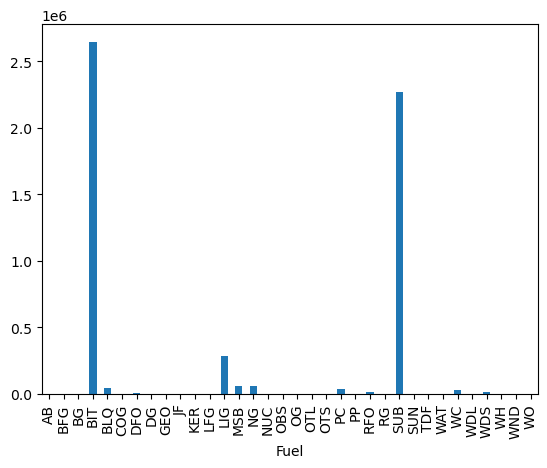

In [598]:
fuel_totals_so2 = df.groupby('Fuel')['SO2'].sum()

fuel_totals_so2.plot(kind = 'bar')


<Axes: xlabel='Fuel'>

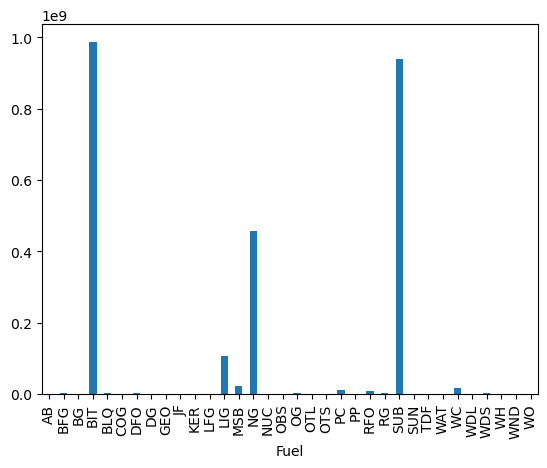

In [599]:
fuel_totals_co2 = df.groupby('Fuel')['CO2'].sum()

fuel_totals_co2.plot(kind = 'bar')

<Axes: xlabel='Fuel'>

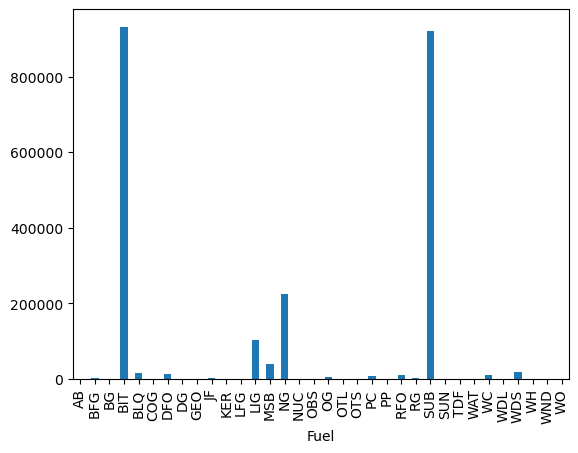

In [600]:
fuel_totals_nox = df.groupby('Fuel')['NOX'].sum()

fuel_totals_nox.plot(kind = 'bar')